Exploratory Data Analysis

Main goals of this EDA are the following :
1. Understand client behavior patterns across locations and channels
2. Identify inefficiencies in the alignment of contacts, orders, and income
3. Highlight candidates for frequency / vist reduction

                         client_count       income  median_ticket  efficiency
priority_flag                                                                
Yellow (Low Eff)                20721  5953.667244     183.851872    0.395516
Red (Low Prof, Low Eff)         17120  1250.321713      55.714306    0.415297
Green (Healthy)                  2330  5959.614627     175.330688    1.130406
Orange (Low Prof)                1978  1716.441057      58.962740    1.134664


/var/folders/xr/bhgzdbq524d_dy1g_st716q80000gn/T/ipykernel_35614/1103500266.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


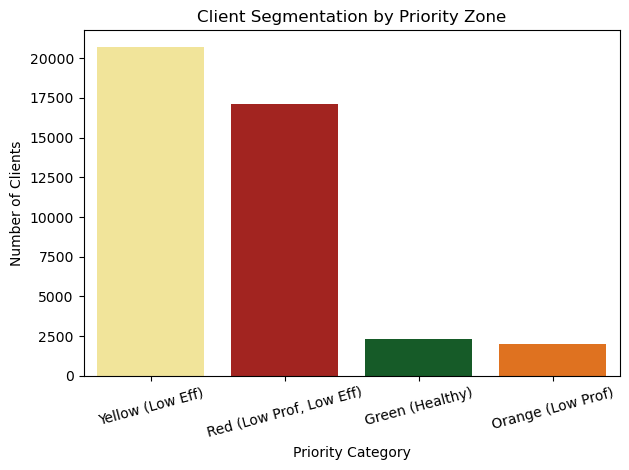

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("dataset/aggregated_client_data.csv")
df = df.drop(columns=["Unnamed: 0"])

# Create profitability and efficiency flags
df["profitability_flag"] = pd.cut(df["median_ticket"],
                                  bins=[-float('inf'), 80, float('inf')],
                                  labels=["Low (≤80€)", "High (>80€)"])

df["efficiency_flag"] = pd.cut(df["efficiency"],
                               bins=[-float('inf'), 1, float('inf')],
                               labels=["Low (<1)", "High (≥1)"])

# Define priority zone
def classify_priority(row):
    if row["profitability_flag"] == "Low (≤80€)" and row["efficiency_flag"] == "Low (<1)":
        return "Red (Low Prof, Low Eff)"
    elif row["profitability_flag"] == "Low (≤80€)":
        return "Orange (Low Prof)"
    elif row["efficiency_flag"] == "Low (<1)":
        return "Yellow (Low Eff)"
    else:
        return "Green (Healthy)"

df["priority_flag"] = df.apply(classify_priority, axis=1)

# Summary table
summary = df.groupby("priority_flag").agg({
    "client_id": "count",
    "income": "mean",
    "median_ticket": "mean",
    "efficiency": "mean"
}).rename(columns={"client_id": "client_count"}).sort_values(by="client_count", ascending=False)

# Display summary
print(summary)

# Define a consistent color palette for priority categories
priority_palette = {
    "Green (Healthy)": "#0b6623",
    "Orange (Low Prof)": "#ff6e00",
    "Red (Low Prof, Low Eff)": "#b80f0a",
    "Yellow (Low Eff)": "#ffee8c"
}

# Display visualization with consistent colors
sns.countplot(
    data=df,
    x="priority_flag",
    order=summary.index,
    palette=[priority_palette[cat] for cat in summary.index]
)
plt.title("Client Segmentation by Priority Zone")
plt.xlabel("Priority Category")
plt.ylabel("Number of Clients")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Total picture of client segmentation shows that majority of the visits are inefficiency. The main opportunity is the red category - orders that have low profitability and low efficiency.

priority_flag   Green (Healthy)  Orange (Low Prof)  Red (Low Prof, Low Eff)  \
city                                                                          
Alicante                     51                 35                      371   
Almeria                      31                 28                      600   
Asturias                    142                 93                      462   
Barcelona                   333                285                     3075   
Bilbao                       51                 37                      426   
Burgos                       32                 34                      318   
Castellón                    12                 25                      251   
Cádiz                        40                 48                      516   
Córdoba                      47                 66                      290   
Girona                       28                 17                      344   
Granada                      34                 34  

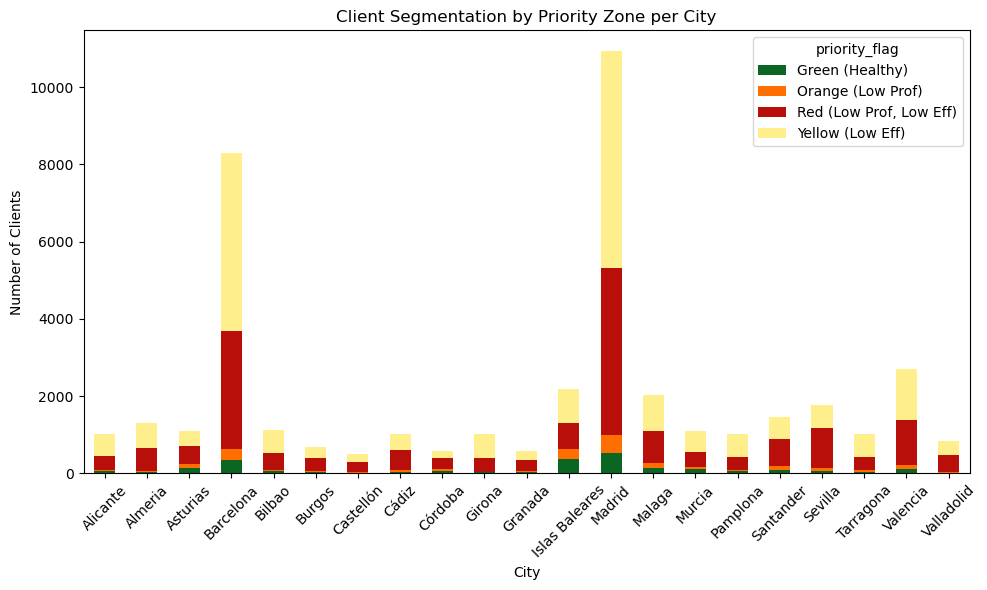

In [10]:
# Count clients per priority_flag for each city
city_segmentation = df.groupby(['city', 'priority_flag']).size().unstack(fill_value=0)

# Display the segmentation table
print(city_segmentation)

# Display visualization with a stacked bar plot and consistent colors
city_segmentation[list(priority_palette.keys())].plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=[priority_palette[col] for col in priority_palette]
)
plt.title("Client Segmentation by Priority Zone per City")
plt.xlabel("City")
plt.ylabel("Number of Clients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On a per city segmentation, inefficiencies are apparent in Barcelona and Madrid. Locations with the most efficient visits are Madrid, Barcelona, Islas Baleares.

priority_flag  Green (Healthy)  Orange (Low Prof)  Red (Low Prof, Low Eff)  \
channel                                                                      
AR                         914                689                     6291   
HR                        1416               1289                    10829   

priority_flag  Yellow (Low Eff)  
channel                          
AR                         8859  
HR                        11862  


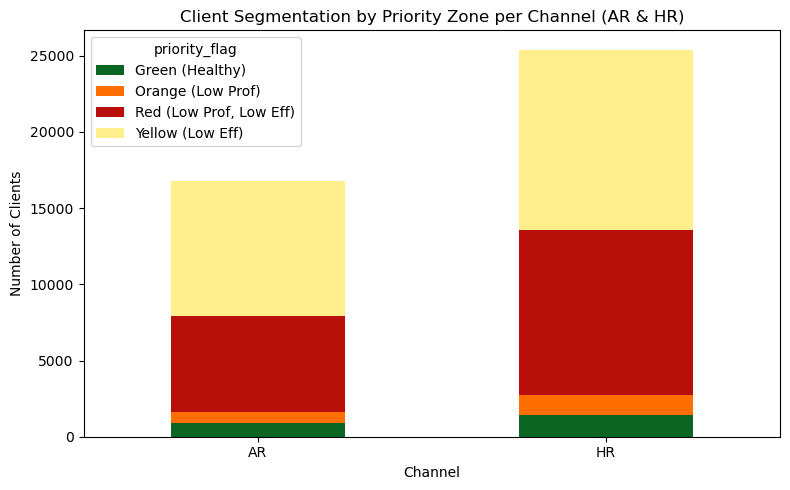

In [11]:
# Create segmentation based on channel (AR & HR) and priority_flag
channel_segmentation = df.groupby(['channel', 'priority_flag']).size().unstack(fill_value=0)

# Display the segmentation table
print(channel_segmentation)

# Visualize segmentation with a stacked bar plot and consistent colors
channel_segmentation[list(priority_palette.keys())].plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=[priority_palette[col] for col in priority_palette]
)
plt.title("Client Segmentation by Priority Zone per Channel (AR & HR)")
plt.xlabel("Channel")
plt.ylabel("Number of Clients")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

On a per channel segmentation, inefficiencies are higher in HR.